In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Завантажуємо таблиці з веб-сторінки
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
dfs = pd.read_html(url)
df = dfs[13]
print(df.head())
# Визначити кількість рядків і стовпців
print("\nКількість рядків та стовпців:", df.shape)

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —

Кількість рядків та стовпців: (28, 9)


In [5]:
# Замінити значення "—" на NaN
df.replace("—", pd.NA, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0                Крим  230.0  206.0  160.0   130    73   126  <NA>  <NA>
1           Вінницька  224.0  192.0  142.0   124    84   112   109    76
2           Волинська  247.0  250.0  179.0   153   112   148   141   101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4            Донецька  271.0  214.0  140.0   109    61    98    82  <NA>
5         Житомирська  261.0  223.0  159.0   129    89   122   120    79
6        Закарпатська  314.0  273.0  207.0   168   115   151   146   104
7          Запорізька  219.0  197.0  150.0   124    71   106   106    68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124   122    88
9            Київська  204.0  189.0  156.0   123    73   122   121    80
10     Кіровоградська  216.0  171.0  145.0   126    79   110   108    68
11          Луганська  262.0  235.0  144.0   116    62    96    51  <NA>
12          Львівська  234.0  240.0  171.0   140   

In [6]:
# Визначити типи всіх стовпців
print("\nТипи всіх стовпців:")
print(df.dtypes)


Типи всіх стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [7]:
# Замінити типи нечислових колонок на числові
df[["2014", "2019"]] = df[["2014", "2019"]].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)
print(df)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object
               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0

In [8]:
# Порахувати частку пропусків у кожному стовпці
missing_data = df.iloc[1:, 1:].isnull().sum() / (len(df) -1) * 100
print("\nЧастка пропусків у кожному стовпці:")
print(missing_data)



Частка пропусків у кожному стовпці:
1950     7.407407
1960     3.703704
1970     3.703704
1990     0.000000
2000     0.000000
2012     0.000000
2014     3.703704
2019    11.111111
dtype: float64


In [9]:
# Видалити останній рядок (дані по всій країні)
df = df.drop(df.index[-1])
print(f'\n Видалили останній рядок (дані по всій країні) \n {df}')


 Видалили останній рядок (дані по всій країні) 
                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116  

In [10]:
# 8. Замінити пропущені значення на середнє по стовпцях
df.fillna(df.mean(numeric_only=True), inplace=True)
df = df.round(2)
print(f'\n Замінили пропущені значення на середнє по стовпцях \n {df}')


 Замінили пропущені значення на середнє по стовпцях 
                Регіон    1950    1960   1970  1990  2000  2012    2014    2019
0                Крим  230.00  206.00  160.0   130    73   126  111.44   80.17
1           Вінницька  224.00  192.00  142.0   124    84   112  109.00   76.00
2           Волинська  247.00  250.00  179.0   153   112   148  141.00  101.00
3    Дніпропетровська  204.00  204.00  151.0   123    71   112  111.00   71.00
4            Донецька  271.00  214.00  140.0   109    61    98   82.00   80.17
5         Житомирська  261.00  223.00  159.0   129    89   122  120.00   79.00
6        Закарпатська  314.00  273.00  207.0   168   115   151  146.00  104.00
7          Запорізька  219.00  197.00  150.0   124    71   106  106.00   68.00
8   Івано-Франківська  243.00  248.00  182.0   155   103   124  122.00   88.00
9            Київська  204.00  189.00  156.0   123    73   122  121.00   80.00
10     Кіровоградська  216.00  171.00  145.0   126    79   110  108.00   68.

In [11]:
# Список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = df['2019'].mean()
regions_above_average_num = df[df['2019'] > average_birth_rate_2019].index.tolist()
regions_above_average_name = df[df['2019'] > average_birth_rate_2019].iloc[:, 0].tolist()
print("\nРегіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
print(average_birth_rate_2019)
print(regions_above_average_num)
print(regions_above_average_name)


Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:
80.17333333333335
[2, 6, 8, 12, 14, 16, 20, 23, 25]
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [12]:
# Знайти регіон з найвищим рівнем народжуваності у 2014 році
highest_birth_rate_2014 = df['2014'].idxmax()
highest_birth_rate_2014_region = df.loc[highest_birth_rate_2014, ['Регіон']]
print(f"\nРегіон з найвищим рівнем народжуваності у 2014 році: {highest_birth_rate_2014_region.item()}")


Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


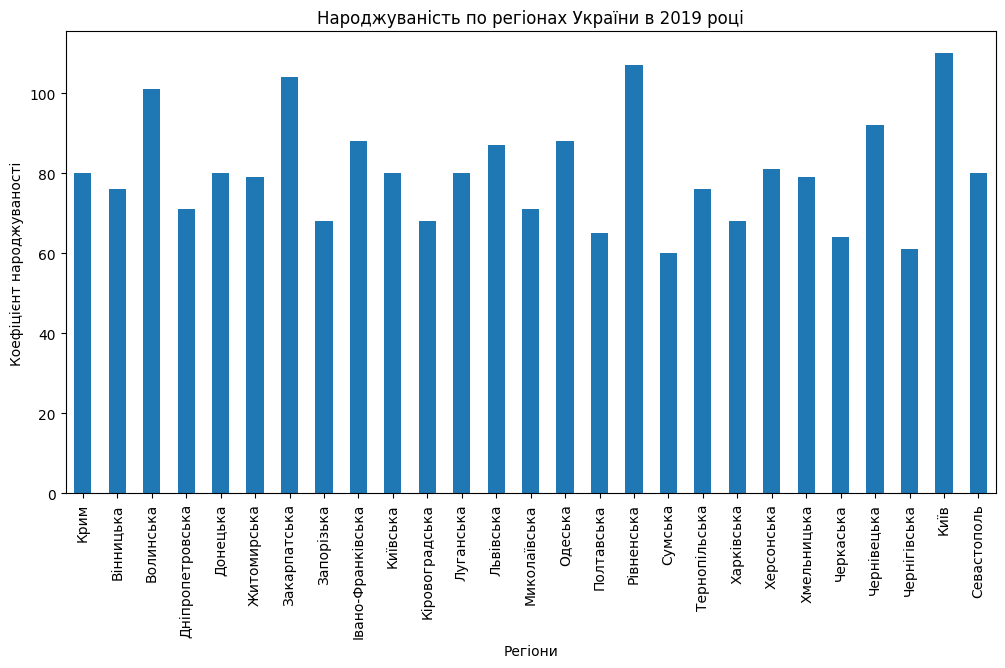

In [13]:
# Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році
df['2019'].plot(kind='bar', figsize=(12, 6))
plt.title("Народжуваність по регіонах України в 2019 році")
plt.xlabel("Регіони")
plt.ylabel("Коефіцієнт народжуваності")
plt.xticks(ticks=range(len(df)), labels=df['Регіон'], rotation=90)
#plt.xticks(rotation=90)
plt.show()

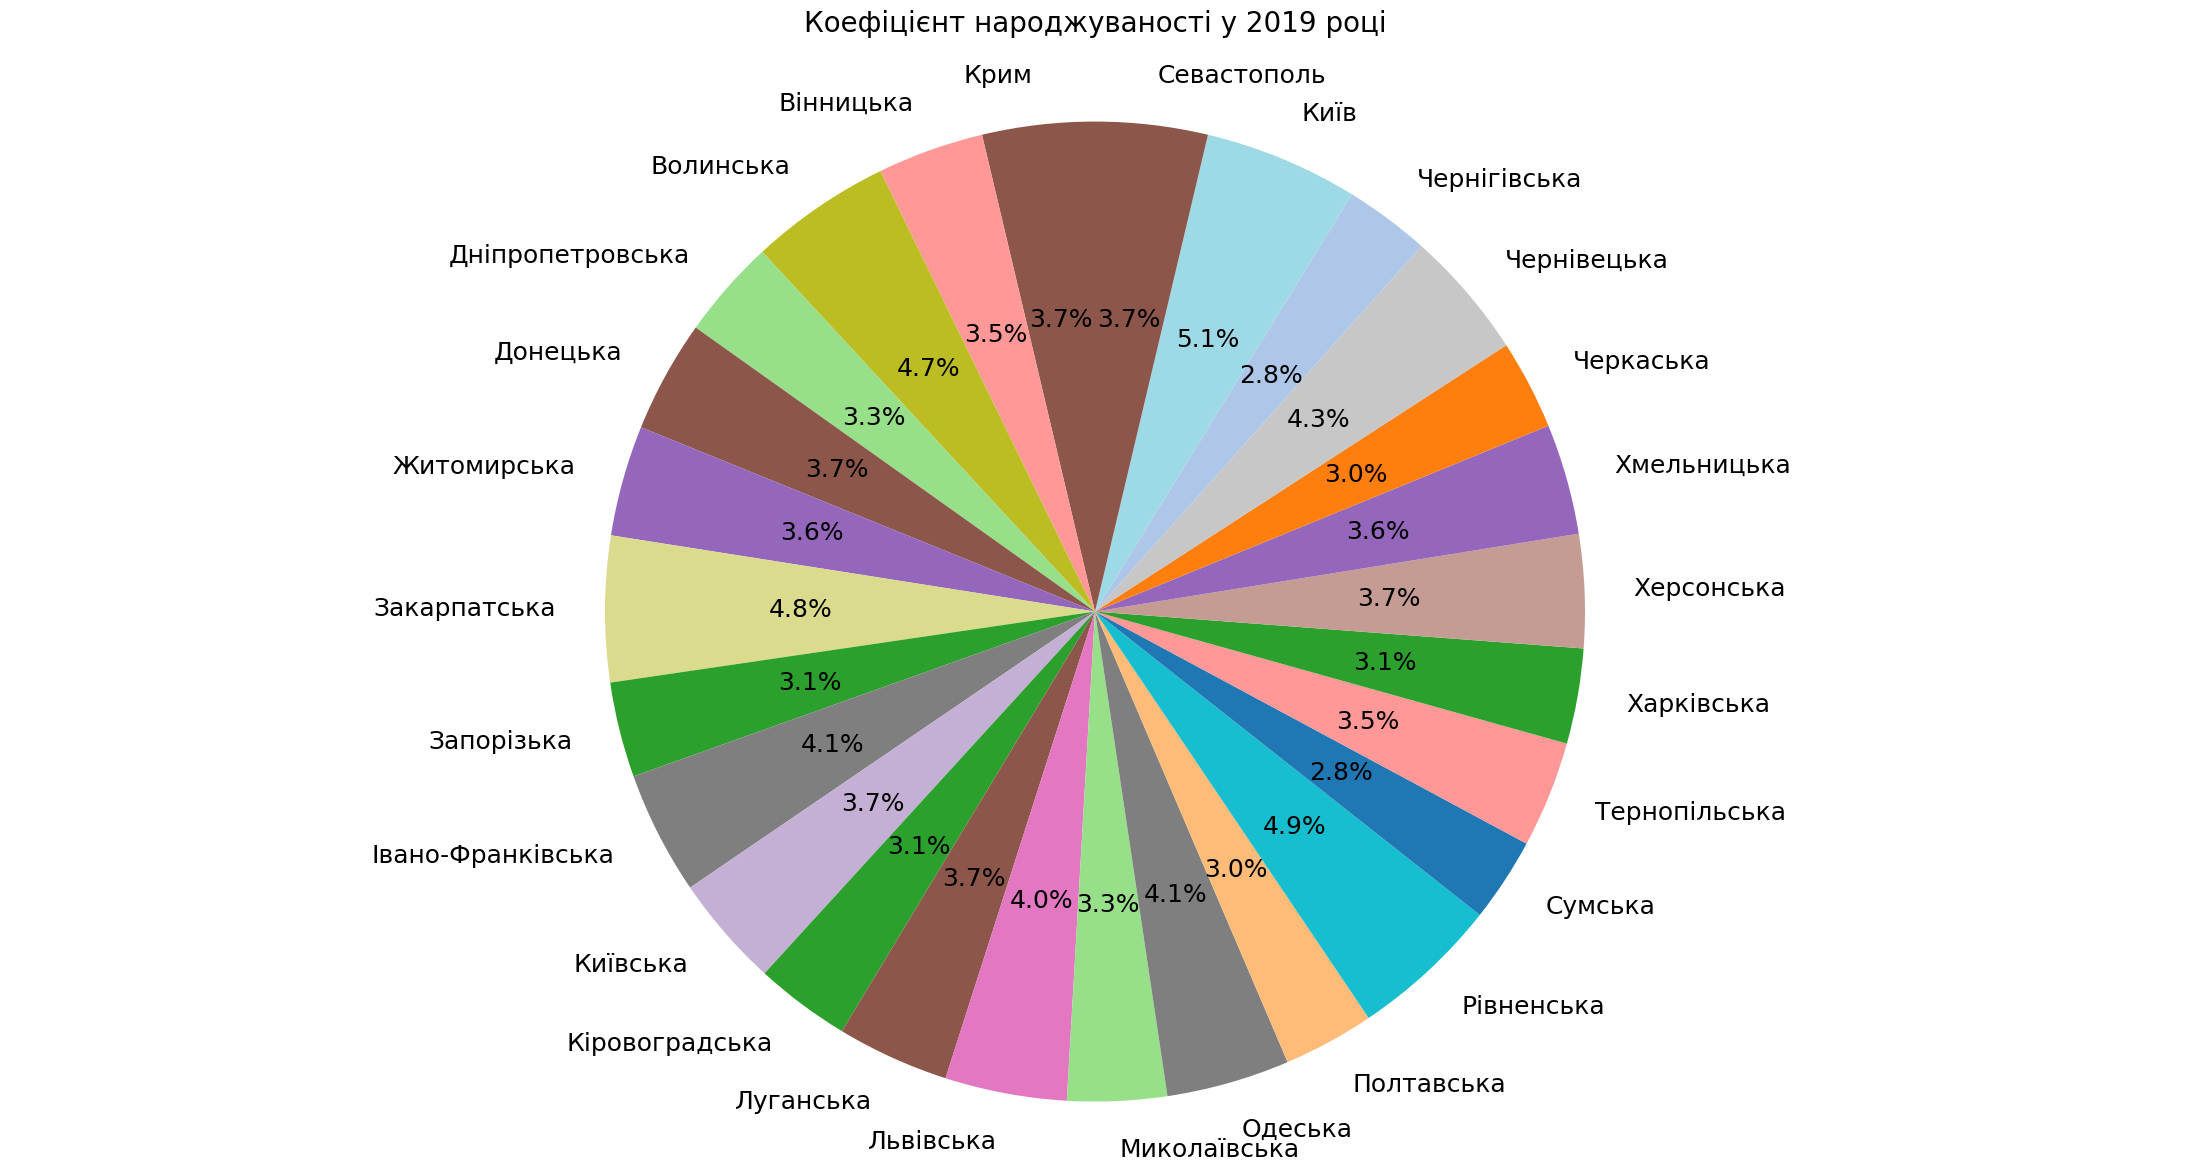

In [51]:
# Унікальні значення для стовпця '2019'
unique_values = np.unique(df['2019'])

# кольорі для кожного унікального значення
colors = plt.get_cmap('tab20', len(unique_values))  
value_to_color = {value: colors(i / len(unique_values)) for i, value in enumerate(unique_values)}

# кольор для кожного регіону в залежності від значення 
region_colors = df['2019'].map(value_to_color)

# Побудова кругової діаграми
plt.figure(figsize=(28, 14))
plt.pie(df['2019'], labels=df['Регіон'], autopct='%1.1f%%', startangle=90, 
        colors=region_colors,  
        textprops={'fontsize': 18}) 

plt.title('Коефіцієнт народжуваності у 2019 році\n', fontsize=20)
plt.axis('equal')
plt.show()

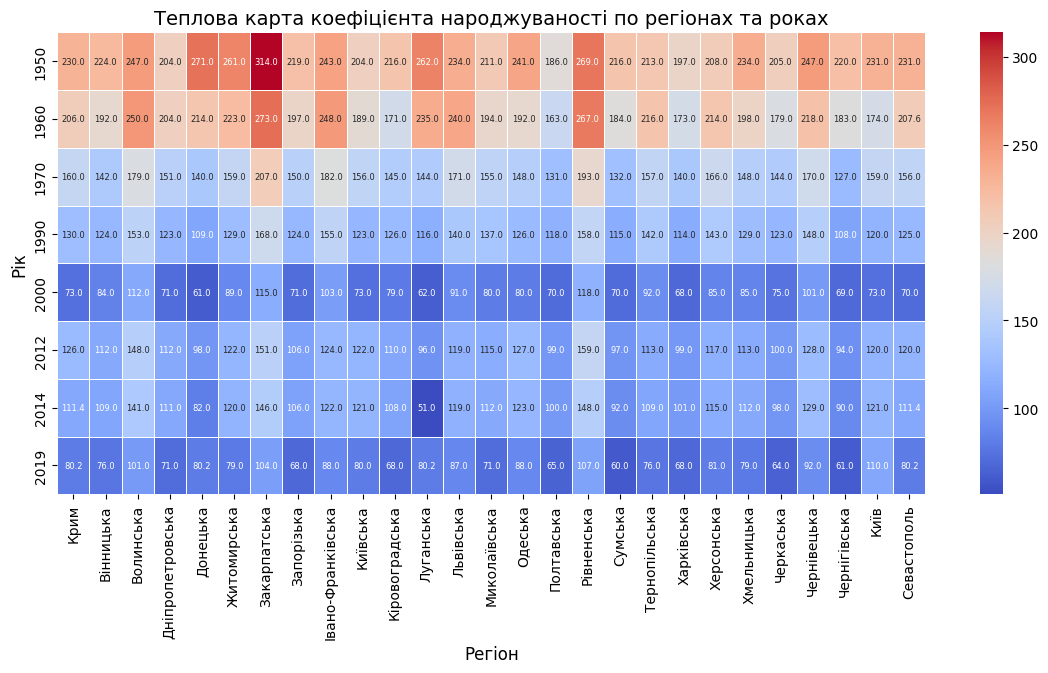

In [45]:
# Створення таблиці для теплової карти
heatmap_data = df.set_index('Регіон').transpose()

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Теплова карта коефіцієнта народжуваності по регіонах та роках', fontsize=14)
plt.xlabel('Регіон', fontsize=12)
plt.ylabel('Рік', fontsize=12)
plt.show()